# 데이터 불러오기

In [1]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


# 데이터 분석하기
## 월별 매출액 추세

In [7]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [8]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = sales_data['결제금액'].str.replace(',', '')
# temp_var.head()

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var = sales_data.astype({'결제금액' : 'int64'})
temp_var.dtypes

# temp_var의 payment열을 date 기준으로 집계하기
temp_var['payment'] = temp_var['결제금액']
# temp_var = temp_var.drop(['결제금액'], axis=1)
# temp_var.head()
# temp_var['payment'].groupby(temp_var['date']).sum()
temp_var.groupby('date').agg({'결제금액':'sum'})

,결제금액
date,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


In [9]:
# temp_var.groupby('date').agg({'결제금액':'sum'})
# temp_var['payment'].groupby(temp_var['date']).sum()
payment_data = temp_var.groupby('date').agg({'결제금액':'sum'})
payment_data

,결제금액
date,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


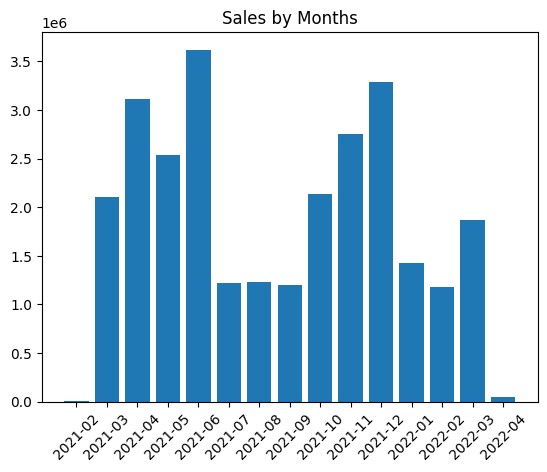

In [10]:
# 집계 결과를 시각화하기
"""
호규님
plt.bar(payment_data.index, payment_data)
plt.title('Sales by Months')
plt.show()
"""

"""
소윤님1
ax = sns.barplot(data=payment_data.reset_index(), x='date', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment By Month')
plt.show()
"""


"""소윤님2"""
plt.bar(payment_data.index, payment_data['결제금액'].values)
plt.title("Sales by Months")
plt.xticks(rotation = 45)
plt.show()

## 가장 인기 있는 음식/음료

In [11]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# temp_var = sales_data.astype({'판매수량' : 'int64'})
# print(temp_var.dtypes)
# condition = (temp_var['판매수량'] > -1)
# (temp_var['판매수량'] > -1).value_counts()
temp_var['상품명'][temp_var['판매수량']!=-1].value_counts()

# Q) []에 조건을 여러 개 설정할 수는 없나?

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
popular_sales = temp_var['상품명'][temp_var['판매수량'] != -1].value_counts()
popular_sales.head(10)
# type(popular_sales.head(10))

김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
Name: 상품명, dtype: int64

In [12]:
items_count = temp_var['상품명'][temp_var['판매수량']!=-1].value_counts()
items_count.head(10)
items_count.head(10).to_frame()

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [13]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


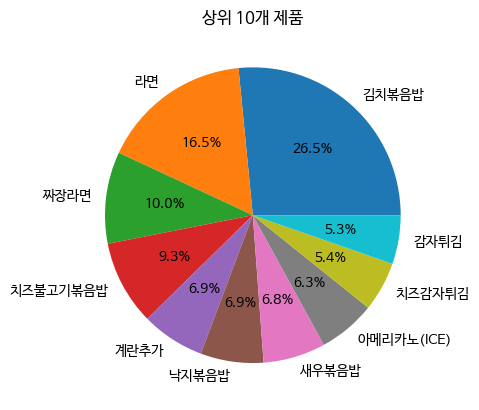

In [14]:
# 집계 결과를 시각화하기
# 파이그래프 활용!
highlight = items_count.head(10)
plt.pie(highlight, labels=highlight.index, autopct = '%1.1f%%')
plt.title('상위 10개 제품')
plt.show()

In [15]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# 판매 개수 = '판매수량', 결제 금액 = '결제금액' or 'payment'
# 판매매출 = 판매수량 * 결제금액
# 상품명을 기준으로 → 'groupby'
temp_var['매출'] = temp_var['결제금액'] * temp_var['판매수량']
total_sales = temp_var.groupby('상품명')['매출'].sum()

# items_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = total_sales.sort_values(ascending=False).head(10)

In [16]:
items_payment

상품명
김치볶음밥         6036900
라면            2967000
치즈불고기볶음밥      2309100
짜장라면          2044500
낙지볶음밥         1721700
새우볶음밥         1549800
치즈감자튀김        1359700
아메리카노(ICE)    1180100
감자튀김          1083800
불닭볶음면          697500
Name: 매출, dtype: int64

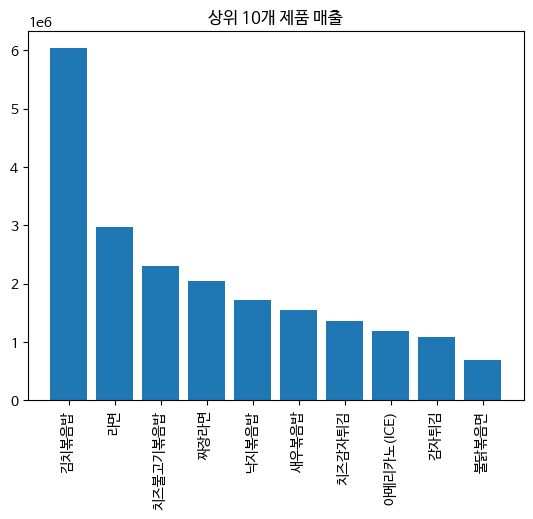

In [17]:
# 집계 결과 시각화하기
plt.bar(items_payment.index, items_payment.values)
plt.title("상위 10개 제품 매출")
plt.xticks(rotation = 90)
plt.show()

## 가장 많이 팔린 입장권 종류

In [18]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var2로 정의하기
temp_var2 = entry_data

# temp_var2의 금액을 숫자형태로 변환하기
# 이미 되어있다... int64로
# temp_var2.info()
temp_var2['금액'] = entry_data['금액'].astype('int64')

# temp_var2의 금액을 요금제명을 기준으로 집계하기
# groupby('요금제명')
# fee_value = temp_var2.groupby('요금제명')['금액'].sum()
ticket_sales = temp_var2.groupby('요금제명')['금액'].sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# fee_value_10 = fee_value.sort_values(ascending=False).head(10)
# fee_value_10
ticket_payment = ticket_sales.sort_values(ascending=False).head(10)
ticket_payment

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

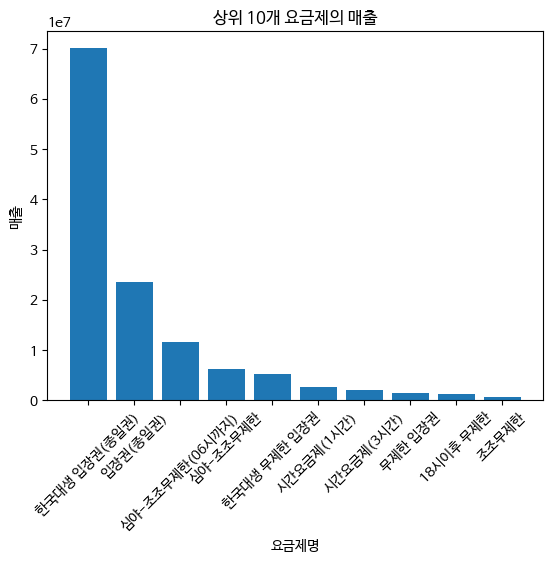

In [19]:
# 집계 결과 시각화하기
# plt.bar(fee_value_10.index, fee_value_10.values)
# plt.title("TOP 10 입장권 매출")
# plt.xticks(rotation = 40)
# plt.show()

plt.bar(ticket_payment.index, ticket_payment.values)
plt.title("상위 10개 요금제의 매출")
plt.xlabel("요금제명")
plt.ylabel("매출")
plt.xticks(rotation = 45)
plt.show()

## 